### Analysing System for science publication texts, machine learning based.

#### Including:
- Text Preprocessing
- KeyWords extraction
- Syntactic Parsing. Part of speech tagging
- Word Embedding (text vectors). 
- Word2Vec Model Visualisation
- TF – IDF matrices 
- Search cosine similarity between documents
- Five different algorithms for construction of summaries: 
    improved "TextRank" from Gensim, usual TextRank, LSA, Kullback–Leibler, LexRank
- Final texts Visualisation

In [1]:
# Word2Vec model (word embeddings).
from gensim.models import Word2Vec

# This summarizer is based on the improved "TextRank" algorithm, and uses "BM25 ranking function".
from gensim.summarization import summarize, keywords

# Four different algorithms: usual TextRank, LSA, Kullback–Leibler, LexRank.
from sumy.summarizers.text_rank import TextRankSummarizer
from sumy.summarizers.lsa import LsaSummarizer
from sumy.summarizers.kl import KLSummarizer
from sumy.summarizers.lex_rank import LexRankSummarizer

# Used for text preprocessing.
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words

# ROUGE - set of metrics used for evaluating automatic summarization.
import sumy.evaluation.rouge as rouge

# Using for search cosine similarity between documents - articles.
from sklearn.metrics.pairwise import cosine_similarity

# Term Frequency – Inverse Document Frequency (TF – IDF).
from sklearn.feature_extraction.text import TfidfVectorizer

# t-distributed Stochastic Neighbor Embedding.
from sklearn.manifold import TSNE

# Used for text preprocessing and part of speech tagging.
import nltk
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer

# Download NLTK corpuses.
nltk.download("stopwords")
nltk.download('wordnet')

import os
import string

# Used for data representation.
import pandas as pd
import numpy as np

# Used for visualisation.
import matplotlib.pyplot as plt
import pylab as pyl
from mpl_toolkits.mplot3d import axes3d

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ksenia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ksenia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
PATH_TEST_SET = 'C:/Users/Ksenia/Downloads/texts_analysing_system/UPDATED_big_data_industrial/big_data_set/'

#### -------------------------- Text Preprocessing ---------------------------------------------------------------------------------------------------------------------

In [3]:
file_name_mapping = {}
test_set = []
count = 0

for file in os.listdir(PATH_TEST_SET):
    if file.endswith(".txt"):
        file_name_mapping[count] = file
        count += 1
        with open(PATH_TEST_SET + file, 'r') as f:
            for line in f:
                line = line.decode("ascii", "ignore")
                # document should always contain only one line
                test_set.append(line)

print('***** File Name Mapping *****')           
for k, v in file_name_mapping.items():
    print('{}: "{}"'.format(k, v))

***** File Name Mapping *****
0: "before_Big-Data-New-Concerns.txt"
1: "before_Big_Data_Analytics_for_Security_Intelligence.txt"
2: "before_Big_Data_Taxonomy.txt"
3: "before_Comment_on_Big_Data_Future_of_Privacy.txt"
4: "before_CSA13-Top10Crypto.txt"
5: "before_CSCC-Cloud-Customer-Architecture-for-Big-Data-and-Analytics.txt"
6: "iso_ISO-IECJTC1-WG9_N0087_N0087_WD_of_ISOIEC_20546_1st_Edition.txt"
7: "iso_N0147_ISO_IEC_20546_2nd_WorkingDraft.txt"
8: "iso_N0200_ISO-IEC_20546_Committee_Draft.txt"
9: "itu_ITU-T-A5-TD-new-Y.txt"
10: "itu_ITUbroshure.txt"
11: "itu_T-REC-Y3600-201511.txt"
12: "nist_NISTSP1500-1.txt"
13: "nist_NISTSP1500-2.txt"
14: "nist_NISTSP1500-4.txt"


In [4]:
colors_mapping = {
    0: 'crimson',
    1: 'deeppink',
    2: 'purple',
    3: 'magenta',
    4: 'palevioletred',
    5: 'plum',
    
    6: 'darkgreen',
    7: 'olive',
    8: 'yellowgreen',
    
    9: 'navy',
    10: 'blue',
    11: 'dodgerblue',
    
    12: 'peru',
    13: 'orange',
    14: 'gold',
}

In [5]:
def text_preprocessing(test_set):
    prepared_test_set = list()
    for document in test_set:
        
        # tokenization – process of converting a text into tokens
        tokens = word_tokenize(document)
        
        # remove stop-words
        filtered_doc_words = [word for word in tokens if word not in stopwords.words('english')]
        
        # lemmatization process - procedure of obtaining the root form of the word
        wordnet_lemmatizer = WordNetLemmatizer()
        lemmatization_words = []
        for word in filtered_doc_words:
            lemm_word = wordnet_lemmatizer.lemmatize(word)
            lemmatization_words.append(lemm_word)
        
        prepared_doc = ' '.join(lemmatization_words)
        prepared_test_set.append(prepared_doc)
        
    return prepared_test_set

prepared_test_set = text_preprocessing(test_set)    

#### -------------------------- KeyWords extraction ----------------------------------------------------------------------------

In [5]:
number_keywords = 8
keywords_test_set = {}
index = 0

for doc in prepared_test_set:
    extracted_keywords =  keywords(doc, words=number_keywords, scores=True, lemmatize=True)
    keywords_test_set[index] = extracted_keywords
    index += 1

In [6]:
dataframe = list()  
for value in keywords_test_set.values():
    dataframe.append(value)

In [7]:
KEYWORDS = pd.DataFrame(dataframe, columns=['KeyWord & Score']*8)
KEYWORDS

KeyWord & Score                     KeyWord & Score  \
0       (data, [0.612348155912])       (analytics, [0.244876763564])   
1       (data, [0.520130222412])         (attacks, [0.175852014905])   
2       (data, [0.604297730325])      (processing, [0.183473842025])   
3       (data, [0.411219633973])         (privacy, [0.208784861117])   
4       (data, [0.546236520624])         (privacy, [0.273159555859])   
5       (data, [0.505470626624])      (encryption, [0.289506469246])   
6       (data, [0.666189215783])             (big, [0.170269630342])   
7       (data, [0.589117068981])             (iso, [0.255760129935])   
8       (data, [0.455755208376])             (iso, [0.284388339452])   
9   (big data, [0.389768703491])  (recommendation, [0.221264240159])   
10      (data, [0.623909386078])             (big, [0.137523480916])   
11       (itu, [0.440165998846])         (reference, [0.3251346283])   
12      (data, [0.546018333569])        (security, [0.311701316982])   
13      (data, [0.696923834677])             (big, [0.202212636889])   
14     (datas, [0.586113493958])        (provides, [0.279266599893])   

                        KeyWord & Score  \
0             (cloud, [0.208001920033])   
1       (information, [0.175761221185])   
2         (databases, [0.165505067549])   
3         (reporting, [0.204739017212])   
4               (big, [0.213572634683])   
5             (cloud, [0.203116864716])   
6   (standardization, [0.150997583426])   
7         (documents, [0.170994622389])   
8         (documents, [0.181044200235])   
9               (itu, [0.167540610417])   
10       (networking, [0.133280420998])   
11      (information, [0.268504686586])   
12               (big, [0.28005883354])   
13        (processed, [0.165728932515])   
14              (big, [0.197770093093])   

                                  KeyWord & Score  \
0                       (users, [0.147090057586])   
1                   (detecting, [0.162085623564])   
2                         (time, [0.14231832846])   
3                  (protecting, [0.204549982658])   
4                   (governing, [0.169491158136])   
5                      (access, [0.153337918575])   
6                        (need, [0.126420732532])   
7             (standardization, [0.155173018485])   
8             (standardization, [0.179342181879])   
9                   (challenged, [0.14771536379])   
10            (standardization, [0.123334772539])   
11  (study group working party, [0.197246350204])   
12                    (privacy, [0.189583089245])   
13                   (analytic, [0.148274462098])   
14                     (needed, [0.148395828992])   

                      KeyWord & Score                   KeyWord & Score  \
0      (processing, [0.142639327577])    (enterprise, [0.133746340371])   
1        (security, [0.157285841468])          (user, [0.132158638484])   
2       (algorithm, [0.133316637438])    (application, [0.13024561573])   
3      (technology, [0.165557658334])   (practicable, [0.150237361564])   
4       (analytics, [0.157373597614])       (leading, [0.156788782966])   
5        (research, [0.152724887644])       (privacy, [0.148208208127])   
6        (processed, [0.12120967957])     (analytics, [0.106920330179])   
7            (need, [0.145123722519])           (big, [0.143270872281])   
8             (big, [0.159657684416])    (relational, [0.150029017907])   
9        (required, [0.144227932513])      (referred, [0.131358717294])   
10  (technological, [0.118801683429])   (informative, [0.104205438804])   
11                               None                              None   
12        (informed, [0.14266281786])  (organization, [0.122113691075])   
13           (need, [0.121940010299])       (volumes, [0.110263207582])   
14      (actor role, [0.13291572576])  (technological, [0.13203462357])   

                       KeyWord & Score                  KeyWord & Score  
0             (need, [0.128836232477])     (provide

#### -------------------------- Syntactic Parsing. Part of speech tagging. ---------------------------------------------------------------------------------------

Universal Part-of-Speech Tagset:

CC: conjunction, coordinating

CD: numeral, cardinal

DT: determiner

IN: preposition or conjunction, subordinating

JJ: adjective or numeral, ordinal

JJR: adjective, comparative

JJS: adjective, superlative

LS: list item marker

MD: modal auxiliary

NN: noun, common, singular or mass

NNP: noun, proper, singular

NNS: noun, common, plural

PDT: pre-determiner

POS: genitive marker

PRP: pronoun, personal

RB: adverb

RBR: adverb, comparative

RBS: adverb, superlative

RP: particle

UH: interjection

VB: verb, base form

VBD: verb, past tense

VBG: verb, present participle or gerund

VBN: verb, past participle

VBP: verb, present tense, not 3rd person singular

VBZ: verb, present tense, 3rd person singular

WDT: WH-determiner

WP: WH-pronoun

WRB: Wh-adverb

In [8]:
partofspeech_tagging_all = list()
for doc in prepared_test_set:
    tokens = word_tokenize(doc)
    partofspeech_tagging_doc = pos_tag(tokens)
    partofspeech_tagging_all.append(partofspeech_tagging_doc)

# for example, to print tagged text, for '3' article
partofspeech_tagging_all[3]

[(u'Big', 'NNP'),
 (u'Data', 'NNP'),
 (u',', ','),
 (u'Big', 'NNP'),
 (u'Concerns', 'NNP'),
 (u',', ','),
 (u'What', 'WP'),
 (u'White', 'NNP'),
 (u'House', 'NNP'),
 (u'Wants', 'NNP'),
 (u'Do', 'NNP'),
 (u'It', 'NNP'),
 (u'.', '.'),
 (u'Big', 'NNP'),
 (u'data', 'NNS'),
 (u'tool', 'NN'),
 (u'offer', 'NN'),
 (u'astonishing', 'VBG'),
 (u'powerful', 'JJ'),
 (u'opportunity', 'NN'),
 (u'unlock', 'NN'),
 (u'previously', 'RB'),
 (u'inaccessible', 'JJ'),
 (u'insight', 'NN'),
 (u'new', 'JJ'),
 (u'existing', 'NN'),
 (u'data', 'NNS'),
 (u'set', 'VBD'),
 (u'.', '.'),
 (u'Large', 'NNP'),
 (u'amount', 'NN'),
 (u'data', 'NNS'),
 (u'processed', 'VBD'),
 (u'new', 'JJ'),
 (u'technique', 'NN'),
 (u'technology', 'NN'),
 (u',', ','),
 (u'dissecting', 'VBG'),
 (u'digital', 'JJ'),
 (u'footprint', 'NN'),
 (u'individual', 'JJ'),
 (u'leave', 'NN'),
 (u'behind', 'IN'),
 (u',', ','),
 (u'revealing', 'VBG'),
 (u'surprising', 'JJ'),
 (u'number', 'NN'),
 (u'personal', 'JJ'),
 (u'detail', 'NN'),
 (u'.', '.'),
 (u'As', 

#### -------------------------- TF – IDF matrices and Search cosine similarity between documents ---------------------

In [7]:
# remove morphological affixes from words, leaving only the word stem
stemmer = nltk.stem.porter.PorterStemmer()

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    tokens = [i for i in tokens if i not in string.punctuation]
    stems = stem_tokens(tokens, stemmer)
    return stems

# TF-IDF matrix for corpus 
corpus_tfidf = TfidfVectorizer(stop_words='english', tokenizer=tokenize)
corpus_representation = corpus_tfidf.fit_transform(prepared_test_set)

feature = corpus_tfidf.get_feature_names()

corpus_representation_arr = corpus_representation.toarray()

In [8]:
def cosine_similarity_results(query_doc):
    tfidf_query_doc = corpus_tfidf.transform([query_doc])
    tfidf_query_doc = tfidf_query_doc.toarray()
    row_i = []
    for i in xrange(len(prepared_test_set)):
        cosine_dist = cosine_similarity(
            corpus_representation_arr[i].reshape(1,-1), tfidf_query_doc.reshape(1,-1))
        row_i.append(cosine_dist[0][0])

    cosine_sim_data.append(row_i)

    
cosine_sim_data = list()    
for doc in prepared_test_set:
    cosine_similarity_results(doc)
    
    
cosine_sim_data = pd.DataFrame(cosine_sim_data)
cosine_sim_data

0         1         2         3         4         5         6   \
0   1.000000  0.366575  0.346053  0.471254  0.267322  0.367867  0.389170   
1   0.366575  1.000000  0.543101  0.484486  0.330349  0.538666  0.485044   
2   0.346053  0.543101  1.000000  0.476664  0.331706  0.532053  0.503898   
3   0.471254  0.484486  0.476664  1.000000  0.456133  0.517489  0.512148   
4   0.267322  0.330349  0.331706  0.456133  1.000000  0.370771  0.324792   
5   0.367867  0.538666  0.532053  0.517489  0.370771  1.000000  0.498515   
6   0.389170  0.485044  0.503898  0.512148  0.324792  0.498515  1.000000   
7   0.352919  0.428789  0.446849  0.442566  0.289233  0.449204  0.919518   
8   0.429574  0.567258  0.632657  0.588220  0.389167  0.621176  0.826503   
9   0.079870  0.037388  0.021854  0.018334  0.001119  0.028258  0.084096   
10  0.460602  0.563567  0.554748  0.553274  0.365222  0.549487  0.571142   
11  0.476192  0.527103  0.558555  0.566953  0.386756  0.593335  0.612355   
12  0.466926  0.617064  0.672096  0.641537  0.418646  0.669297  0.762802   
13  0.425705  0.527493  0.535230  0.569609  0.355259  0.562782  0.656369   
14  0.491691  0.562037  0.516058  0.631664  0.434186  0.548448  0.592556   

          7         8         9         10        11        12        13  \
0   0.352919  0.429574  0.079870  0.460602  0.476192  0.466926  0.425705   
1   0.428789  0.567258  0.037388  0.563567  0.527103  0.617064  0.527493   
2   0.446849  0.632657  0.021854  0.554748  0.558555  0.672096  0.535230   
3   0.442566  0.588220  0.018334  0.553274  0.566953  0.641537  0.569609   
4   0.289233  0.389167  0.001119  0.365222  0.386756  0.418646  0.355259   
5   0.449204  0.621176  0.028258  0.549487  0.593335  0.669297  0.562782   
6   0.919518  0.826503  0.084096  0.571142  0.612355  0.762802  0.656369   
7   1.000000  0.779094  0.087421  0.525607  0.541899  0.657105  0.582358   
8   0.779094  1.000000  0.049878  0.651113  0.703545  0.860824  0.715879   
9   0.087421  0.049878  1.000000  0.081371  0.175181  0.038929  0.050771   
10  0.525607  0.651113  0.081371  1.000000  0.627111  0.688102  0.610770   
11  0.541899  0.703545  0.175181  0.627111  1.000000  0.736540  0.653997   
12  0.657105  0.860824  0.038929  0.688102  0.736540  1.000000  0.822026   
13  0.582358  0.715879  0.050771  0.610770  0.653997  0.822026  1.000000   
14  0.536626  0.653654  0.036060  0.612265  0.622244  0.736072  0.750148   

          14  
0   0.491691  
1   0.562037  
2   0.516058  
3   0.631664  
4   0.434186  
5   0.548448  
6   0.592556  
7   0.536626  
8   0.653654  
9   0.036060  
10  0.612265  
11  0.622244  
12  0.736072  
13  0.750148  
14  1.000000

#### -------------------------- Summary by improved "TextRank" --------------------------------------------------

In [11]:
summary_len_words = 250
count = 0

with open(PATH_TEST_SET + 'gensim_summaries.txt', 'w') as ff:
    for doc in test_set:
        summary = summarize(doc, word_count=summary_len_words)
        val = '\n\n\n ******* The name of the file is "{}" ******* \n'.format(file_name_mapping[count])
        print(val)
        ff.write(val)
        count += 1
        print(summary)
        ff.write(summary)




 ******* The name of the file is "before_CSCC-Cloud-Customer-Architecture-for-Big-Data-and-Analytics.txt" ******* 

Private cloud deployment is a solution  that generally offers the most efficient access to this secure data while maintaining access to internally  shared software and analytics.
Critical data and processing remains in the enterprise data center, while other  resources are deployed in public cloud environments.
Another benefit is the ability to develop applications on dedicated resource pools in a hybrid cloud  deployment that eliminates the need to compromise on configuration details like processors, GPUs,  memory, networking and even software licensing constraints.
Figure 1 shows the elements that may be needed for any big data analytics solution across three  domains: public networks, provider clouds, and enterprise networks.
The provider cloud uses data integration components and potentially streaming computing to capture this combined data into data repositories w

#### -------------------------- Summaries by algorithms: usual TextRank, LSA, Kullback–Leibler, LexRank ------------------------------------------

In [8]:
# to regulate the length of summary
SENTENCES_COUNT = 8

stemmer = Stemmer("english")
summaries_mapping = {0: 'usual TextRank', 1: 'LSA', 2: 'Kullback–Leibler', 3: 'LexRank'}
metrics = {}
f_index = 0

with open('C:/Users/Ksenia/Downloads/summaries_methods.txt', 'w') as fff:
    for file in os.listdir(PATH_TEST_SET):
        if file.endswith(".txt"):
            rouge_metrics=list()
            val = '\n\n ************ Summaries for file {}. ************ \n'.format(file)
            print(val)
            fff.write(val)
            parsed_text = PlaintextParser.from_file(PATH_TEST_SET + file, Tokenizer("english"))
            summarizers = [
                TextRankSummarizer(stemmer), 
                LsaSummarizer(stemmer), 
                KLSummarizer(stemmer), 
                LexRankSummarizer(stemmer)
            ]
            for summarizer in summarizers:
                summarizer.stop_words = get_stop_words("english")

            summaries = [[]] * 4
            for i in range(4):
                val1 = '\n--------- Summary by {} algorithm --------- \n'.format(summaries_mapping[i])
                print(val1)
                fff.write(val1)
                for sentence in summarizers[i](parsed_text.document, SENTENCES_COUNT):
                    summaries[i].append(sentence)
                    print(sentence)
                    fff.write(str(sentence))
                
                # computing of Recall-Oriented Understudy for Gisting Evaluation (ROUGE)
                rouge_metrics.append(rouge.rouge_n(summaries[i], parsed_text.document.sentences, n=3))
                
            metrics[f_index] = rouge_metrics
            f_index += 1



 ************ Summaries for file before_Big-Data-New-Concerns.txt. ************ 


--------- Summary by usual TextRank algorithm --------- 

The Report identifies five  areas of focus:  protecting privacy, preventing discrimination, ensuring responsible use of information by  government agencies, harnessing data as a public resource, and using big data to enhance learning  opportunities.
The Report concludes with policy recommendations, including, advancing the Consumer Privacy  Bill of Rights; passing national data breach legislation; amending the Electronic Communications Privacy Act;  expanding technical expertise to stop discrimination; extending privacy protections to non-U.S. persons; and  ensuring that data collected on students in school are used for educational purposes.
Federal agencies with expertise in  privacy and data practices should provide technical assistance to state, local, and other federal law enforcement  agencies seeking to deploy big data techniques.
The Repo

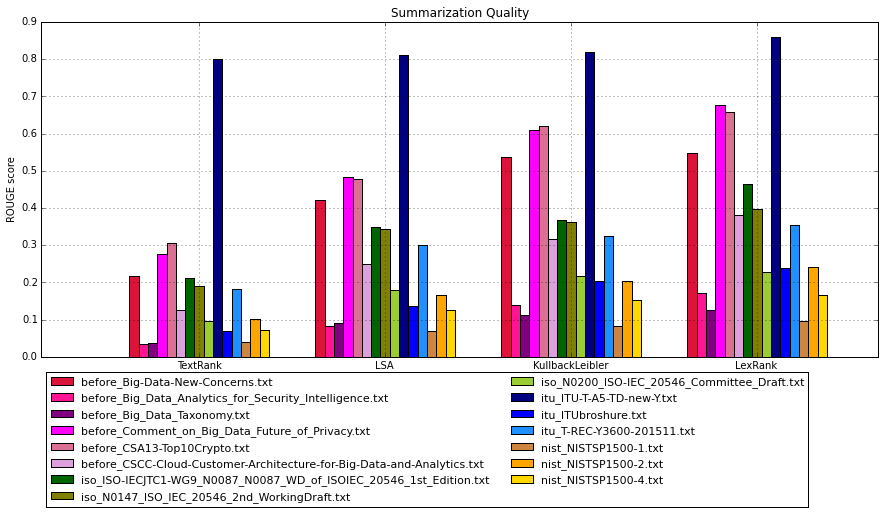

In [19]:
# visualization for ROUGE metric
%matplotlib inline 
texts_number = len(metrics.keys())
width = 10
ii = [0, 200, 400, 600]
colorlabels = list()
filenamescolors = list()

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)

for text_index in range(texts_number):   
    ind = list()
    for elem in ii:
        position = elem + (width*text_index)
        ind.append(position) 
    yvals = metrics[text_index]
    color = colors_mapping[text_index]
    filenamescolors.append(file_name_mapping[text_index])
    label = ax.bar(ind, yvals, width, color=color, align='center')
    colorlabels.append(label[0])
    if text_index == int(texts_number/2):
        xticks = ind

ax.set_title('Summarization Quality')
ax.set_ylabel('ROUGE score')
ax.set_xticks(xticks)
ax.set_xticklabels(('TextRank', 'LSA', 'KullbackLeibler', 'LexRank'))
ax.grid()
ax.legend(colorlabels, filenamescolors, loc='upper left', ncol=2, fontsize=11, bbox_to_anchor=(0, -0.03))
plt.show()    

#### ------------------------------------------------ Texts Visualisation ------------------------------------------------

In [7]:
stemmer = nltk.stem.porter.PorterStemmer()

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    tokens = [i for i in tokens if i not in string.punctuation]
    stems = stem_tokens(tokens, stemmer)
    return stems

# TF-IDF matrix for corpus, extracting 4-gramms
corpus_tfidf = TfidfVectorizer(
    ngram_range=(4,4), stop_words='english', tokenizer=tokenize)
corpus_representation = corpus_tfidf.fit_transform(prepared_test_set)
features= corpus_tfidf.get_feature_names()
corpus_representation_arr = corpus_representation.toarray()

In [8]:
ngramm_representation = corpus_representation_arr.transpose()

# similar to PCA method for dimension reduction
newtsne = TSNE(n_components=3, random_state=0)

In [9]:
ngramm_representation.shape

reduced_matr = newtsne.fit_transform(ngramm_representation)

(23387L, 15L)

In [13]:
ngramms_number, texts_number = ngramm_representation.shape

In [14]:
mappingfeatures = {}

for i in xrange(int(texts_number)):
    features_presented = []
    doc_raw = enumerate(corpus_representation_arr[i])
    for ngram in doc_raw:
        if ngram[1] > 0.0:
            features_presented.append(ngram[0])
            
    mappingfeatures[i] = features_presented

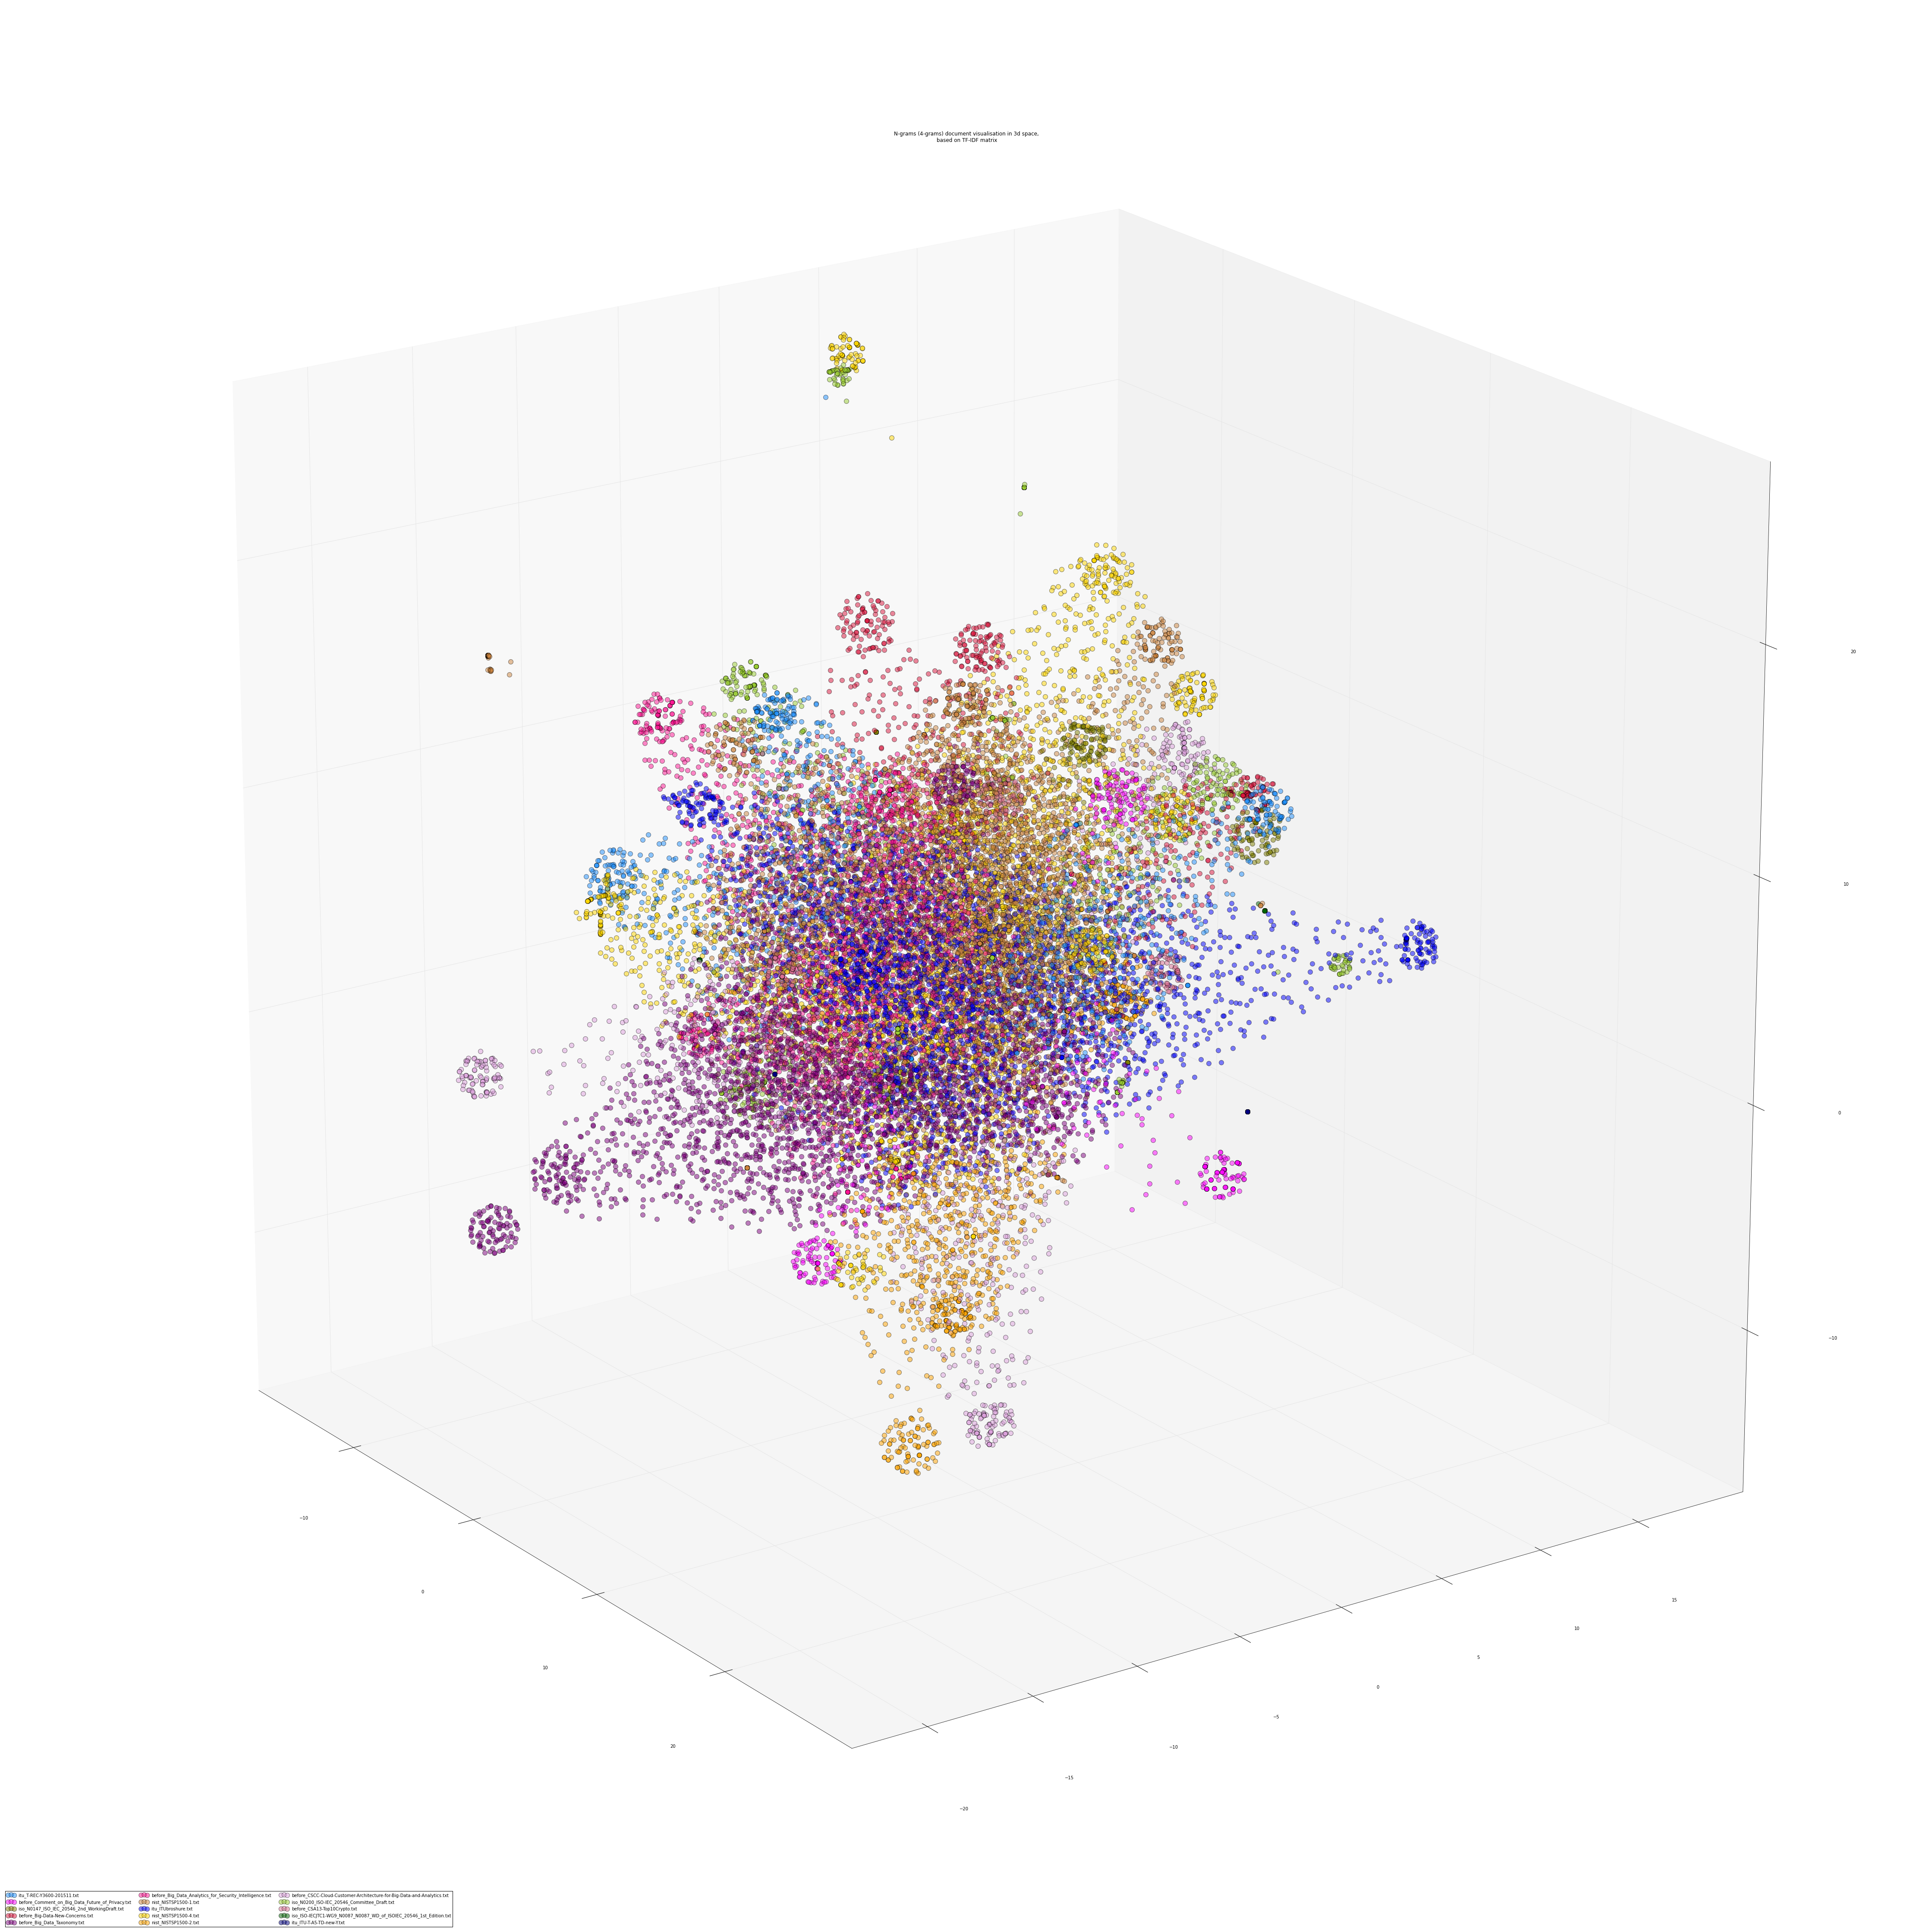

In [21]:
%matplotlib inline
fig = plt.figure(figsize=(80,80))
ax = fig.gca(projection='3d')
set_labels = set()

for i in xrange((int(reduced_matr.shape[0]))):
    xs = reduced_matr[i,0]
    ys = reduced_matr[i,1]
    zs = reduced_matr[i,2]
    
    color = None
    label = None
    
    if i in mappingfeatures[0]:
        color = colors_mapping[0]
        label = '{}'.format(file_name_mapping[0])
    
    if i in mappingfeatures[1]:
        color = colors_mapping[1]
        label = '{}'.format(file_name_mapping[1])
        
    if i in mappingfeatures[2]:
        color = colors_mapping[2]
        label = '{}'.format(file_name_mapping[2])
        
    if i in mappingfeatures[3]:
        color = colors_mapping[3]
        label = '{}'.format(file_name_mapping[3])
        
    if i in mappingfeatures[4]:
        color = colors_mapping[4]
        label = '{}'.format(file_name_mapping[4])
        
    if i in mappingfeatures[5]:
        color = colors_mapping[5]
        label = '{}'.format(file_name_mapping[5])
    
    if i in mappingfeatures[6]:
        color = colors_mapping[6]
        label = '{}'.format(file_name_mapping[6])
        
    if i in mappingfeatures[7]:
        color = colors_mapping[7]
        label = '{}'.format(file_name_mapping[7])
        
    if i in mappingfeatures[8]:
        color = colors_mapping[8]
        label = '{}'.format(file_name_mapping[8])
        
    if i in mappingfeatures[9]:
        color = colors_mapping[9]
        label = '{}'.format(file_name_mapping[9])
        
    if i in mappingfeatures[10]:
        color = colors_mapping[10]
        label = '{}'.format(file_name_mapping[10])
        
    if i in mappingfeatures[11]:
        color = colors_mapping[11]
        label = '{}'.format(file_name_mapping[11])
        
    if i in mappingfeatures[12]:
        color = colors_mapping[12]
        label = '{}'.format(file_name_mapping[12])
        
    if i in mappingfeatures[13]:
        color = colors_mapping[13]
        label = '{}'.format(file_name_mapping[13])
        
    if i in mappingfeatures[14]:
        color = colors_mapping[14]
        label = '{}'.format(file_name_mapping[14])
    
    if label in set_labels:
        label = None
    else:    
        set_labels.add(label)
        
    ax.scatter(xs, ys, zs, c=color, marker='o', alpha=0.5, s=120, label=label)
    
ax.set_title('N-grams (4-grams) document visualisation in 3d space,\n based on TF-IDF matrix \n \n')
ax.set_xlim(min(reduced_matr[:,0]), max(reduced_matr[:,0]))
ax.set_ylim(min(reduced_matr[:,1]), max(reduced_matr[:,1]))
ax.set_zlim(min(reduced_matr[:,2]), max(reduced_matr[:,2]))

ax.view_init(elev=20., azim=-35)

plt.legend(loc='lower left', ncol=3, fontsize=10, bbox_to_anchor=(0, 0))
plt.show()